## Modelling the Data

### Import Data

In [775]:
# Importing all modules
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import pickle

from sklearn import metrics
from time import time
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [1022]:
df = pd.read_csv("capstone_clean.csv")
pd.set_option('display.max_columns', None)
df.head(10)

,date,ws_00,ws_03,ws_06,ws_09,ws_12,ws_15,ws_18,ws_21,wg_00,wg_03,wg_06,wg_09,wg_12,wg_15,wg_18,wg_21,t_00,t_03,t_06,t_09,t_12,t_15,t_18,t_21,r_00,r_03,r_06,r_09,r_12,r_15,r_18,r_21,cc_00,cc_03,cc_06,cc_09,cc_12,cc_15,cc_18,cc_21,wd_00,wd_03,wd_06,wd_09,wd_12,wd_15,wd_18,wd_21,planing,sail,conditions,wind_number,wind,month,category
0,2023-05-21,5,7,8,6,6,5,5,2,18,13,24,19,19,11,8,5,18,17,17,19,20,18,18,16,0.1,0.0,0.3,0.1,0.0,0.1,0.5,0.5,100,100,100,74,92,100,100,70,237.0,231.0,270.0,280.0,279.0,405.0,210.0,279.0,0,4.5,Light wind day,2,1,5,0
1,2023-05-22,7,3,3,2,2,2,6,3,20,14,8,6,2,8,15,9,15,16,15,17,19,23,18,18,0.3,0.0,0.3,0.1,0.0,0.0,0.3,0.0,100,100,100,100,100,100,100,89,292.0,290.0,243.0,274.0,445.0,439.0,298.0,391.0,0,4.5,Longboard freestyle,2,1,5,0
2,2023-05-23,5,3,2,1,3,7,7,3,8,4,6,6,4,7,12,5,17,16,16,19,22,22,21,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,6,7,11,6,0,8,100,489.0,287.0,267.0,266.0,384.0,443.0,447.0,466.0,4,4.4,Classic Vass,4,5,5,1
3,2023-05-24,1,2,2,2,3,7,7,2,4,1,5,2,3,9,9,6,18,17,16,19,22,22,22,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100,100,15,6,0,0,0,0,326.0,276.0,310.0,416.0,427.0,460.0,475.0,188.0,4,5.7,Good Freeride,3,4,5,1
4,2023-05-25,2,2,2,2,3,6,4,4,3,4,3,5,2,7,7,6,18,18,17,20,23,23,23,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,7,99,22,100,6,0,72,535.0,223.0,277.0,261.0,418.0,459.0,513.0,237.0,1,6.5,A little blow,3,1,5,1
5,2023-05-26,2,1,5,1,4,7,6,4,6,4,4,2,2,9,7,7,19,18,18,21,23,23,20,20,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,7,17,7,12,10,8,100,100,366.0,187.0,204.0,400.0,451.0,240.0,207.0,207.0,0,7.5,Longboard racing,2,1,5,0
6,2023-05-27,2,2,4,4,3,6,7,8,2,4,6,10,7,5,12,15,18,19,18,21,23,24,23,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57,59,13,14,18,100,100,100,204.0,241.0,252.0,303.0,361.0,465.0,508.0,518.0,3,4.4,Strong off shore,4,5,5,1
7,2023-05-28,3,1,2,3,4,7,6,3,5,3,4,7,3,8,7,5,19,19,18,21,23,24,23,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100,75,9,34,0,7,0,0,228.0,265.0,321.0,403.0,445.0,471.0,517.0,517.0,2,5.3,Nice cross shore,4,1,5,1
8,2023-05-29,2,3,4,4,5,7,5,2,1,2,4,9,7,6,9,1,20,19,18,20,23,23,22,21,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,8,11,9,13,12,0,0,100,283.0,271.0,318.0,308.0,330.0,403.0,442.0,231.0,0,5,Improvers loving it!,1,2,5,0
9,2023-05-30,4,6,5,4,5,6,3,4,5,8,11,8,5,4,5,7,19,19,18,20,22,22,23,20,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.1,79,23,11,9,82,19,13,0,275.0,272.0,286.0,316.0,344.0,379.0,437.0,459.0,1,7.5,Little blow,2,3,5,0


### Train Test Split

In [593]:
# Splitting features and target
feature_cols = list(df.columns)
feature_cols.remove('planing')
feature_cols.remove('sail')
feature_cols.remove('conditions')
feature_cols.remove('wind_number')
feature_cols.remove('wind')
feature_cols.remove('category')

X = df[feature_cols] # Features/Independent variables
y = df['category'] # Target/Label/Dependent variables

# Using sklearn to split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [594]:
# Checking split
min(X_train.index == y_train.index)
min(X_test.index == y_test.index)

True

In [595]:
X_train.head() # Checking first 5 rows of X_train

,date,ws_00,ws_03,ws_06,ws_09,ws_12,ws_15,ws_18,ws_21,wg_00,wg_03,wg_06,wg_09,wg_12,wg_15,wg_18,wg_21,t_00,t_03,t_06,t_09,t_12,t_15,t_18,t_21,r_00,r_03,r_06,r_09,r_12,r_15,r_18,r_21,cc_00,cc_03,cc_06,cc_09,cc_12,cc_15,cc_18,cc_21,wd_00,wd_03,wd_06,wd_09,wd_12,wd_15,wd_18,wd_21,month
110,2023-09-14,5,6,4,4,6,8,9,6,7,9,7,7,7,9,12,8,23,22,21,23,27,28,26,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100,5,8,100,77,99,100,100,508.0,508.0,521.0,505.0,482.0,479.0,477.0,493.0,9
137,2022-06-02,3,0,3,1,4,9,10,6,6,5,5,3,5,11,15,10,23,22,21,25,29,29,27,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,6,535.0,515.0,384.0,451.0,480.0,495.0,465.0,465.0,6
700,2018-08-31,4,3,2,2,2,7,7,6,4,3,3,2,2,8,8,7,27,26,26,26,28,28,27,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,512.0,517.0,533.0,269.0,383.0,459.0,486.0,488.0,8
359,2021-09-07,6,6,7,8,6,3,3,7,12,9,9,14,10,3,6,14,22,22,21,23,25,28,27,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,0,0,12,100,8,100,100,236.0,243.0,237.0,238.0,258.0,344.0,521.0,238.0,9
546,2019-07-30,8,6,7,8,13,15,15,12,10,8,9,11,14,17,18,15,25,25,25,26,26,26,26,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,483.0,501.0,512.0,506.0,485.0,483.0,483.0,489.0,7


In [596]:
X_train.columns

Index(['date', 'ws_00', 'ws_03', 'ws_06', 'ws_09', 'ws_12', 'ws_15', 'ws_18',
       'ws_21', 'wg_00', 'wg_03', 'wg_06', 'wg_09', 'wg_12', 'wg_15', 'wg_18',
       'wg_21', 't_00', 't_03', 't_06', 't_09', 't_12', 't_15', 't_18', 't_21',
       'r_00', 'r_03', 'r_06', 'r_09', 'r_12', 'r_15', 'r_18', 'r_21', 'cc_00',
       'cc_03', 'cc_06', 'cc_09', 'cc_12', 'cc_15', 'cc_18', 'cc_21', 'wd_00',
       'wd_03', 'wd_06', 'wd_09', 'wd_12', 'wd_15', 'wd_18', 'wd_21', 'month'],
      dtype='object')

### Feature Engineering

I will be trying three models: DF, RF and LogReg.

Tree-based models are invariant to the scale of the features.
Random Forest is a tree-based model and hence does not require feature scaling.

Ideas:

* For LogReg, I could use scaling
* Month could be converted with OHE.
* Wind Direction needs to be catagorised at some point

For now, I'll convert Month and test the basic models

#### OHE

In [597]:
X_train_OHE = pd.get_dummies(X_train_copy, columns=['month'], drop_first=True, prefix='month', dtype=int)

In [598]:
X_train_OHE.head()

,date,ws_00,ws_03,ws_06,ws_09,ws_12,ws_15,ws_18,ws_21,wg_00,wg_03,wg_06,wg_09,wg_12,wg_15,wg_18,wg_21,t_00,t_03,t_06,t_09,t_12,t_15,t_18,t_21,r_00,r_03,r_06,r_09,r_12,r_15,r_18,r_21,cc_00,cc_03,cc_06,cc_09,cc_12,cc_15,cc_18,cc_21,wd_00,wd_03,wd_06,wd_09,wd_12,wd_15,wd_18,wd_21,month_6,month_7,month_8,month_9,month_10
110,2023-09-14,5,6,4,4,6,8,9,6,7,9,7,7,7,9,12,8,23,22,21,23,27,28,26,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100,5,8,100,77,99,100,100,508.0,508.0,521.0,505.0,482.0,479.0,477.0,493.0,0,0,0,1,0
137,2022-06-02,3,0,3,1,4,9,10,6,6,5,5,3,5,11,15,10,23,22,21,25,29,29,27,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,6,535.0,515.0,384.0,451.0,480.0,495.0,465.0,465.0,1,0,0,0,0
700,2018-08-31,4,3,2,2,2,7,7,6,4,3,3,2,2,8,8,7,27,26,26,26,28,28,27,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,512.0,517.0,533.0,269.0,383.0,459.0,486.0,488.0,0,0,1,0,0
359,2021-09-07,6,6,7,8,6,3,3,7,12,9,9,14,10,3,6,14,22,22,21,23,25,28,27,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,0,0,12,100,8,100,100,236.0,243.0,237.0,238.0,258.0,344.0,521.0,238.0,0,0,0,1,0
546,2019-07-30,8,6,7,8,13,15,15,12,10,8,9,11,14,17,18,15,25,25,25,26,26,26,26,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,483.0,501.0,512.0,506.0,485.0,483.0,483.0,489.0,0,1,0,0,0


#### Combined function

In [599]:
# Creating a combined functions
def feature_eng(df):
  ''' function to combine all feature engineering processes for my capstone dataframe.'''
  df = df.copy()
  df = pd.get_dummies(df, columns=['month'], drop_first=True, prefix='month', dtype=int)
  return df

In [600]:
X_train_fe = feature_eng(X_train)

In [601]:
X_train_fe.columns

Index(['date', 'ws_00', 'ws_03', 'ws_06', 'ws_09', 'ws_12', 'ws_15', 'ws_18',
       'ws_21', 'wg_00', 'wg_03', 'wg_06', 'wg_09', 'wg_12', 'wg_15', 'wg_18',
       'wg_21', 't_00', 't_03', 't_06', 't_09', 't_12', 't_15', 't_18', 't_21',
       'r_00', 'r_03', 'r_06', 'r_09', 'r_12', 'r_15', 'r_18', 'r_21', 'cc_00',
       'cc_03', 'cc_06', 'cc_09', 'cc_12', 'cc_15', 'cc_18', 'cc_21', 'wd_00',
       'wd_03', 'wd_06', 'wd_09', 'wd_12', 'wd_15', 'wd_18', 'wd_21',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10'],
      dtype='object')

In [602]:
X_test_fe = feature_eng(X_test)

In [603]:
df_fe = feature_eng(df)

#### Feature Selection

In [604]:
# Create a list of all possible features
pair_columns = ['ws_00', 'ws_03', 'ws_06', 'ws_09', 'ws_12', 'ws_15', 'ws_18',
       'ws_21', 'wg_00', 'wg_03', 'wg_06', 'wg_09', 'wg_12', 'wg_15', 'wg_18',
       'wg_21', 't_00', 't_03', 't_06', 't_09', 't_12', 't_15', 't_18', 't_21',
       'r_00', 'r_03', 'r_06', 'r_09', 'r_12', 'r_15', 'r_18', 'r_21', 'cc_00',
       'cc_03', 'cc_06', 'cc_09', 'cc_12', 'cc_15', 'cc_18', 'cc_21', 'wd_00',
       'wd_03', 'wd_06', 'wd_09', 'wd_12', 'wd_15', 'wd_18', 'wd_21','month_6', 
       'month_7', 'month_8', 'month_9', 'month_10', 'category']

In [605]:
# Show absolute correlations of features vs. target
df_fe[pair_columns].corr(numeric_only=True)['category'].abs().sort_values(ascending=False)

category    1.000000
ws_15       0.355800
ws_18       0.353831
wg_18       0.257540
wg_15       0.250550
cc_09       0.238634
cc_06       0.232288
wd_12       0.222753
cc_12       0.218645
wd_03       0.214467
ws_21       0.212383
wd_06       0.211555
wd_21       0.211428
cc_15       0.187349
cc_03       0.185083
wd_15       0.182538
month_7     0.181013
cc_21       0.180855
wd_18       0.177176
cc_18       0.172577
wd_09       0.165967
wg_21       0.156672
cc_00       0.154431
ws_00       0.153396
wd_00       0.129380
t_09        0.129236
r_21        0.126766
month_9     0.123935
wg_00       0.122824
month_10    0.120270
t_12        0.113252
r_06        0.103207
ws_03       0.098771
t_03        0.096386
wg_09       0.092451
t_06        0.092200
r_00        0.090498
t_00        0.089181
ws_09       0.083929
wg_03       0.080690
t_15        0.077250
t_18        0.069500
ws_12       0.058027
r_15        0.057544
r_03        0.056440
t_21        0.043836
r_18        0.038476
r_09        0

In [874]:
# List all features
model_features = ['month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'ws_00', 'ws_03', 'ws_06', 'ws_09', 'ws_12', 'ws_15', 'ws_18', 'ws_21',
       'wg_00', 'wg_03', 'wg_06', 'wg_09', 'wg_12', 'wg_15', 'wg_18','wg_21', 
       't_00', 't_03', 't_06', 't_09', 't_12', 't_15', 't_18', 't_21',
       'r_00', 'r_03', 'r_06', 'r_09', 'r_12', 'r_15', 'r_18', 'r_21',
       'cc_03', 'cc_06', 'cc_09', 'cc_12', 'cc_15', 'cc_18', 'cc_21', 
       'wd_00', 'wd_03', 'wd_06', 'wd_09', 'wd_12', 'wd_15', 'wd_18', 'wd_21']

In [777]:
# List features with correlation above 0.05
select_features = ['month_7', 'month_9', 'month_10',
       'ws_00', 'ws_03', 'ws_09', 'ws_12', 'ws_15', 'ws_18', 'ws_21',
       'wg_00', 'wg_03', 'wg_09', 'wg_15', 'wg_18','wg_21', 
       't_00', 't_03', 't_06', 't_09', 't_12', 't_15', 't_18',
       'r_00', 'r_03', 'r_06', 'r_15', 'r_21',
       'cc_03', 'cc_06', 'cc_09', 'cc_12', 'cc_15', 'cc_18', 'cc_21', 
       'wd_00', 'wd_03', 'wd_06', 'wd_09', 'wd_12', 'wd_15', 'wd_18', 'wd_21']

In [1000]:
# By correlation
min_features = ['ws_12', 'ws_15', 'ws_18', 'ws_21', 'wg_12', 'wg_15', 't_12',
                't_15', 't_18', 'cc_09', 'cc_12', 'cc_15', 'wd_12', 'wd_15', 'wd_18']

# By LogReg feature importance
min_features2 = ['ws_15', 'ws_18', 't_21', 'ws_09', 'wg_21', 'ws_21', 'month_7', 'wg_03',
                 't_12', 'wg_15', 't_09', 'wg_00', 'ws_06', 'wg_06', 't_00', 'month_9', 'month_8']

# Combining min_features with wd transform
min_features3 = ['ws_12', 'ws_15', 'ws_18', 'ws_21', 'wg_12', 'wg_15', 't_12',
                't_15', 't_18', 'cc_09', 'cc_12', 'cc_15', 'wd_12', 'wd_15', 'wd_18']

### Model Trial 1: DT

In [608]:
# Create model and fit on train.
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X_train_fe[model_features], y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [609]:
# Check classes
treeclf.classes_

array([0, 1, 2], dtype=int64)

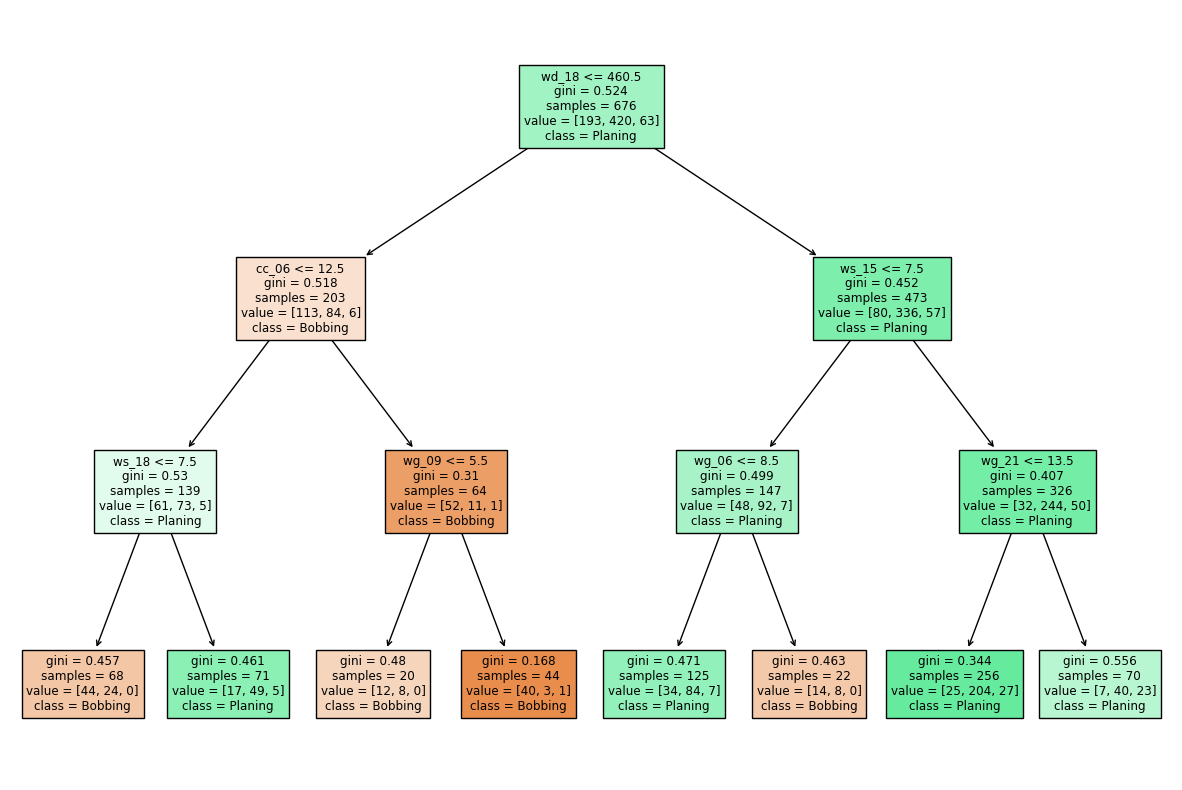

In [610]:
# Plot to visualise tree
fig = plt.figure(figsize=(15,10))
tree_1 = tree.plot_tree(treeclf,
                   feature_names=model_features,
                   class_names=["Bobbing", "Planing", "Flying"],
                   filled=True)

In [611]:
# Evaluate on train and test
print(f'Score on training set: {treeclf.score(X_train_fe[model_features], y_train)}')
print(f'Score on testing set: {treeclf.score(X_test_fe[model_features], y_test)}')

Score on training set: 0.7204142011834319
Score on testing set: 0.6094674556213018


> OK! Let's get some better parameters...

In [612]:
# Using cross validation and grid search to find best paramaters

grid = GridSearchCV(estimator = DecisionTreeClassifier(), # What is the algorithm/model to use?
                    param_grid = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10], # How many levels can I go down?
                                  'min_samples_split': [5, 10, 15, 20, 50, 100, 150, 200],
                                  'min_samples_leaf': [2, 3, 4, 5, 6, 7],
                                  'max_features':[2, 5]}, # How many parameters can I use?
                    cv = 10, # How many splits
                    refit = True, # Do we refit the data on each run?
                    verbose = 1, # How much to tell us?
                    scoring = 'accuracy') # Which performance metric am I maximising?

In [613]:
# Run the gridsearch

# Record the current time
now = time()

# Fit the gridsearch on Train
grid.fit(X_train_fe[model_features], y_train)

# Record the time when it stopped running
print(f' Time in seconds: {time() - now}')

Fitting 10 folds for each of 768 candidates, totalling 7680 fits
 Time in seconds: 46.622724771499634


In [614]:
# Best model parameters
grid.best_params_

{'max_depth': 7,
 'max_features': 5,
 'min_samples_leaf': 7,
 'min_samples_split': 100}

In [615]:
# Accuracy for best paramaters
grid.best_score_

0.6820237050043899

In [616]:
# Best model
grid.best_estimator_

DecisionTreeClassifier(max_depth=7, max_features=5, min_samples_leaf=7,
                       min_samples_split=100)

In [617]:
# Create best model and fit on train
dt = grid.best_estimator_

In [618]:
dt.fit(X_train_fe[model_features], y_train)

DecisionTreeClassifier(max_depth=7, max_features=5, min_samples_leaf=7,
                       min_samples_split=100)

In [619]:
# Evaluate model.
print(f'Score on training set: {dt.score(X_train_fe[model_features], y_train)}')
print(f'Score on testing set: {dt.score(X_test_fe[model_features], y_test)}')

Score on training set: 0.7189349112426036
Score on testing set: 0.6035502958579881


> Slightly less overtrained - let's try RF to reduce the gap.

### Model Trial 2: RF

In [781]:
rf = RandomForestClassifier(n_estimators=50) # creates a random forest classifier with 50 trees.

In [793]:
rf_score = cross_val_score(rf, X_train_fe[model_features], y_train, cv=5) # cross validation scores with 5 folds

In [783]:
print(f'Random scored {rf_score}')

Random scored [0.67647059 0.61481481 0.63703704 0.62962963 0.72592593]


In [794]:
# Using cross validation and grid search to find best paramaters

rf_params = {
    'n_estimators': [50, 100, 150], # how many trees?
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], # how many levels per tree?
}


gs = GridSearchCV(rf, param_grid=rf_params, cv=7) # grid search on rf_params

gs.fit(X_train_fe[model_features], y_train) # fit to training data

print(gs.best_score_)

gs.best_params_

0.6894329896907216


{'max_depth': 9, 'n_estimators': 50}

In [795]:
rf = gs.best_estimator_

In [796]:
rf.fit(X_train_fe[model_features], y_train)

RandomForestClassifier(max_depth=9, n_estimators=50)

In [797]:
# Evaluate model.
print(f'Score on training set: {rf.score(X_train_fe[model_features], y_train)}')
print(f'Score on testing set: {rf.score(X_test_fe[model_features], y_test)}')

Score on training set: 0.9112426035502958
Score on testing set: 0.6686390532544378


> Decent score, but still very overtrained.

### Model Trial 3: LogReg

In [986]:
# Create and train model
logreg = LogisticRegression(max_iter=500)
# Need scaled data

logreg.fit(X_train_fe[model_features], y_train)

C:\Users\katie\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [987]:
# Evaluate model.
print(f'Score on training set: {logreg.score(X_train_fe[model_features], y_train)}')
print(f'Score on testing set: {logreg.score(X_test_fe[model_features], y_test)}')

Score on training set: 0.7100591715976331
Score on testing set: 0.6982248520710059


In [988]:
# Extract feature importance
feature_importance = abs(logreg.coef_[0])

# Associate feature names with their importance values
feature_names = model_features
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Sort features by importance in descending order
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print sorted feature importance
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")

ws_15: 0.16164060215146134
ws_18: 0.14689299560989966
t_21: 0.1037549452983736
ws_09: 0.06837034398636141
wg_21: 0.06778969680744339
ws_21: 0.03967678369800139
month_7: 0.03939731515670709
wg_03: 0.03354659611903132
t_12: 0.030516518923845926
wg_15: 0.029713028046395057
t_09: 0.02952021575742641
wg_00: 0.02686963075306459
ws_06: 0.026022657047552127
wg_06: 0.0242365143690168
t_00: 0.022939276108906632
month_9: 0.02083977241619173
month_8: 0.020566341572306458
t_15: 0.019962450962286354
wg_09: 0.01990789998294173
wg_18: 0.01749844005891985
wg_12: 0.017438768762695445
r_15: 0.01698540900136561
ws_12: 0.016426153695501124
r_06: 0.015399441208279878
r_00: 0.014976592252788726
r_03: 0.014120462742339319
r_21: 0.013564916241483418
r_09: 0.012309706815179835
ws_00: 0.010415626784774479
cc_09: 0.009980198011981103
r_12: 0.00893631315202851
t_06: 0.008318504646197511
cc_15: 0.008135606537986277
cc_21: 0.007805196268019149
cc_18: 0.007457643461787961
r_18: 0.006907864499825859
month_10: 0.006795

> Way better, let's move foreward with LogReg.

### LogReg Tuning

#### Further feature engineering

In [709]:
# Creating a combined functions
def extra_feature_eng(df):
  ''' function to combine all feature engineering processes for my capstone dataframe.'''
  df = df.copy()
  scaler = MinMaxScaler()
  scaler_cols = ['ws_00', 'ws_03', 'ws_06', 'ws_09', 'ws_12', 'ws_15', 'ws_18', 'ws_21',
       'wg_00', 'wg_03', 'wg_06', 'wg_09', 'wg_12', 'wg_15', 'wg_18','wg_21', 
       't_00', 't_03', 't_06', 't_09', 't_12', 't_15', 't_18', 't_21',
       'r_00', 'r_03', 'r_06', 'r_09', 'r_12', 'r_15', 'r_18', 'r_21',
       'cc_03', 'cc_06', 'cc_09', 'cc_12', 'cc_15', 'cc_18', 'cc_21', 
       'wd_00', 'wd_03', 'wd_06', 'wd_09', 'wd_12', 'wd_15', 'wd_18', 'wd_21']
  scaler.fit(df[scaler_cols])
  df[scaler_cols] = scaler.transform(df[scaler_cols])
  return df

In [710]:
X_train_fe2 = extra_feature_eng(X_train_fe)

In [711]:
X_test_fe2 = extra_feature_eng(X_test_fe)

#### Creating new model to tune

In [1001]:
# Create and train model
logreg1 = LogisticRegression(max_iter=500)
# Try less features
# May need scaling

logreg1.fit(X_train_fe[min_features], y_train)

C:\Users\katie\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [1002]:
# Evaluate model.
print(f'Score on training set: {logreg1.score(X_train_fe[min_features], y_train)}')
print(f'Score on testing set: {logreg1.score(X_test_fe[min_features], y_test)}')

Score on training set: 0.6789940828402367
Score on testing set: 0.6863905325443787


In [1003]:
# Extract feature importance
feature_importance = abs(logreg1.coef_[0])

# Associate feature names with their importance values
feature_names = min_features
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Sort features by importance in descending order
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print sorted feature importance
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")

ws_15: 0.23461919124451297
ws_18: 0.16301215652151133
t_15: 0.07967881580967581
ws_12: 0.0734198350287353
wg_12: 0.06817973637233346
ws_21: 0.06124411807545759
t_18: 0.0586610380000611
t_12: 0.05213790920382077
wg_15: 0.032192020831227144
cc_09: 0.010517063542138017
cc_12: 0.004205530805252922
wd_12: 0.0021785793397643446
wd_15: 0.0016649188224382937
wd_18: 0.0011225935097248715
cc_15: 0.0010737673736943812


#### Setting prediction boundaries

In [1013]:
# Predict probabilities and assign to columns
X_train_fe[['prob_0', 'prob_1', 'prob_2']] = logreg1.predict_proba(X_train_fe[min_features])

In [1018]:
# Make predictions using cut-off point
X_train_fe['y_pred'] = np.where(X_train_fe['prob_0']>0.47, 0, np.where(X_train_fe['prob_1']>0.47, 1, 2)) #condition
X_train_fe.head(20)

,date,ws_00,ws_03,ws_06,ws_09,ws_12,ws_15,ws_18,ws_21,wg_00,wg_03,wg_06,wg_09,wg_12,wg_15,wg_18,wg_21,t_00,t_03,t_06,t_09,t_12,t_15,t_18,t_21,r_00,r_03,r_06,r_09,r_12,r_15,r_18,r_21,cc_00,cc_03,cc_06,cc_09,cc_12,cc_15,cc_18,cc_21,wd_00,wd_03,wd_06,wd_09,wd_12,wd_15,wd_18,wd_21,month_6,month_7,month_8,month_9,month_10,prob_0,prob_1,prob_2,y_pred
110,2023-09-14,5,6,4,4,6,8,9,6,7,9,7,7,7,9,12,8,23,22,21,23,27,28,26,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100,5,8,100,77,99,100,100,508.0,508.0,521.0,505.0,482.0,479.0,477.0,493.0,0,0,0,1,0,0.485621,0.496154,0.018225,0
137,2022-06-02,3,0,3,1,4,9,10,6,6,5,5,3,5,11,15,10,23,22,21,25,29,29,27,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,6,535.0,515.0,384.0,451.0,480.0,495.0,465.0,465.0,1,0,0,0,0,0.117044,0.717308,0.165648,1
700,2018-08-31,4,3,2,2,2,7,7,6,4,3,3,2,2,8,8,7,27,26,26,26,28,28,27,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,512.0,517.0,533.0,269.0,383.0,459.0,486.0,488.0,0,0,1,0,0,0.190928,0.740721,0.068351,1
359,2021-09-07,6,6,7,8,6,3,3,7,12,9,9,14,10,3,6,14,22,22,21,23,25,28,27,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,0,0,12,100,8,100,100,236.0,243.0,237.0,238.0,258.0,344.0,521.0,238.0,0,0,0,1,0,0.877653,0.121455,0.000892,0
546,2019-07-30,8,6,7,8,13,15,15,12,10,8,9,11,14,17,18,15,25,25,25,26,26,26,26,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,483.0,501.0,512.0,506.0,485.0,483.0,483.0,489.0,0,1,0,0,0,0.063870,0.600060,0.336070,1
777,2017-07-22,3,1,2,2,2,7,10,7,4,2,2,2,2,8,11,8,25,26,25,26,28,29,28,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,511.0,193.0,227.0,250.0,453.0,461.0,477.0,491.0,0,1,0,0,0,0.103491,0.831833,0.064676,1
109,2023-09-13,4,3,2,1,2,5,8,7,6,4,2,3,3,6,12,10,23,22,22,23,27,28,26,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5,0,0,0,7,0,522.0,198.0,275.0,413.0,472.0,485.0,506.0,506.0,0,0,0,1,0,0.219864,0.728264,0.051873,1
277,2021-06-17,5,4,3,1,6,9,8,6,2,4,2,3,6,9,7,4,19,18,18,22,24,25,24,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88,17,100,0,10,6,6,0,495.0,480.0,181.0,443.0,457.0,464.0,486.0,496.0,1,0,0,0,0,0.155549,0.705221,0.139230,1
103,2023-09-07,4,6,4,4,7,5,5,7,15,20,17,12,21,15,9,12,21,21,21,23,27,26,27,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100,8,93,98,81,100,91,100,253.0,258.0,267.0,255.0,273.0,311.0,233.0,245.0,0,0,0,1,0,0.986458,0.013173,0.000369,0
509,2019-06-23,8,2,1,2,3,6,6,9,9,3,2,3,4,8,8,13,27,26,26,26,28,28,27,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28,17,85,51,12,50,57,42,488.0,496.0,286.0,445.0,412.0,435.0,409.0,409.0,1,0,0,0,0,0.568262,0.410100,0.021639,0


In [1015]:
# Predict probabilities and assign to columns
X_test_fe[['prob_0', 'prob_1', 'prob_2']] = logreg1.predict_proba(X_test_fe[min_features])

In [1019]:
# Make predictions using cut-off point
X_test_fe['y_pred'] = np.where(X_test_fe['prob_0']>0.47, 0, np.where(X_test_fe['prob_1']>0.47, 1, 2)) #condition
X_test_fe.head()

,date,ws_00,ws_03,ws_06,ws_09,ws_12,ws_15,ws_18,ws_21,wg_00,wg_03,wg_06,wg_09,wg_12,wg_15,wg_18,wg_21,t_00,t_03,t_06,t_09,t_12,t_15,t_18,t_21,r_00,r_03,r_06,r_09,r_12,r_15,r_18,r_21,cc_00,cc_03,cc_06,cc_09,cc_12,cc_15,cc_18,cc_21,wd_00,wd_03,wd_06,wd_09,wd_12,wd_15,wd_18,wd_21,month_6,month_7,month_8,month_9,month_10,prob_0,prob_1,prob_2,y_pred
645,2018-07-07,5,7,6,7,9,12,15,14,6,8,7,8,11,15,20,22,24,24,24,25,26,26,26,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,506.0,504.0,504.0,498.0,486.0,484.0,489.0,494.0,0,1,0,0,0,0.074733,0.756116,0.169151,1
688,2018-08-19,4,3,4,5,3,7,9,12,5,4,5,5,4,9,12,15,27,27,27,27,29,31,31,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,8,0,7,512.0,180.0,248.0,246.0,218.0,536.0,196.0,240.0,0,0,1,0,0,0.784190,0.157141,0.058669,0
591,2019-09-13,8,8,10,8,6,6,12,8,9,10,13,11,9,10,15,10,25,25,25,26,26,27,27,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,15,0,0,0,0,0,0,182.0,206.0,244.0,257.0,232.0,516.0,515.0,513.0,0,0,0,1,0,0.431764,0.522353,0.045883,1
205,2022-08-09,9,9,6,9,8,9,13,7,16,17,11,12,4,16,27,17,27,26,26,30,33,33,30,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,5,6,8,185.0,183.0,191.0,227.0,199.0,518.0,518.0,516.0,0,0,1,0,0,0.320986,0.542650,0.136364,1
664,2018-07-26,8,6,3,3,3,6,7,5,10,8,4,4,3,6,7,6,26,25,25,25,26,27,27,26,0.0,0.1,0.6,0.5,0.0,0.0,0.0,0.1,5,0,0,12,31,11,29,63,472.0,465.0,478.0,280.0,355.0,442.0,463.0,485.0,0,1,0,0,0,0.303991,0.661814,0.034196,1


#### Evaluating

In [1020]:
# Evaluate model.
print(f"Accuracy on training set: {metrics.accuracy_score(y_train, X_train_fe['y_pred'])}")
print(f"Accuracy on testing set: {metrics.accuracy_score(y_test, X_test_fe['y_pred'])}")


Accuracy on training set: 0.6789940828402367
Accuracy on testing set: 0.6804733727810651


> Without a scaler, all features, max_iter = 500 and boundary = 0.45 provides the best result, with a score on train and test of 0.7 and 0.69 respectively. However, this comes with a convergence warning from the model.

> Using the min_features, no scalar and boundary = 0.47, we can achieve a slightly undertrained model, with accuracy at 0.6790 and 0.6805 for train and test respectively.


> Using the MinMaxScaler is the next best model, with max_iter = 150 and boundary = 0.4.

### Pickle time!

In [1021]:
## Serialise
with open('logreg.sav', 'wb') as file: ## Create a file to write our object in (wb = write binary)
    pickle.dump(logreg1, file, protocol=pickle.HIGHEST_PROTOCOL) ## dump the object in the file
    
## Don't forget to CLOSE THE FILE after using it!
file.close()